# Edge Cover Problem

Given a graph $G=(V,E)$, find the minimum set of edges that covers all the vertices in the graph.

## Variables:
$$
x_{e} = \begin{cases}
1 \text{ if edge $e$ is selected } \\
0 \text{ otherwise }
\end{cases}
$$

## Formulation:
\begin{eqnarray}
min && \sum_{e \in E} x_{e} \\
s.t.\\
\sum_{e \in E(i)} x_e \geq 1 , &&&& \forall i \in V\\
x_{e} \in {\{0,1\}}^{|E|}
\end{eqnarray}

In [1]:
import networkx as nx
import gurobipy as gb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# create the graph
G = nx.Graph()

In [3]:
# add nodes
G.add_nodes_from([1,2,3,4,5,6,7,8])

In [4]:
# add edges
G.add_edges_from([(1,2),(1,4),(1,6),(2,3),(2,4),(3,5),(3,8),(4,7),(5,8),(6,7),(7,8)])

G:


C:\Users\Riccardo\Anaconda3\envs\myenv\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


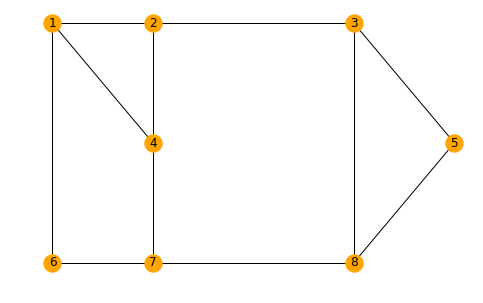

In [5]:
# plot G
plt.figure(figsize=(8,5))
plt.axis('off')

pos = {1:(0,2),2:(1,2),3:(3,2),4:(1,1),5:(4,1),6:(0,0),7:(1,0),8:(3,0)}
node_labels = {i:i for i in G.nodes()}

nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_color='orange')
nx.draw_networkx_edges(G,pos,edgelist=G.edges())
nx.draw_networkx_labels(G,pos,labels=node_labels)

print("G:")

In [6]:
# model
edge_cover = gb.Model()

Academic license - for non-commercial use only


In [7]:
# add vars
x = edge_cover.addVars(G.edges(), vtype=gb.GRB.BINARY,name='x')

In [8]:
# set objective function
edge_cover.setObjective(x.sum(),gb.GRB.MINIMIZE)

In [9]:
# add constrs (ricordiamo che (i,j) = (j,i) ma abbiamo le variabili x solo per (i,j))
for i in G.nodes():
    name = "node_%s" % (i)
    linexpr = gb.LinExpr()
    for j in G.adj[i]:
        if edge_cover.getVarByName("x[%s,%s]" % (i,j)) is not None:
            linexpr+=x[i,j]
        else:
            linexpr+=x[j,i]
            
    edge_cover.addConstr(linexpr >= 1,name=name)

In [10]:
# update model
edge_cover.update()

In [11]:
# write model
edge_cover.write('edgecover.lp')

In [12]:
# solve
edge_cover.optimize()

Optimize a model with 8 rows, 11 columns and 22 nonzeros
Variable types: 0 continuous, 11 integer (11 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 5.0000000
Presolve time: 0.00s
Presolved: 8 rows, 11 columns, 22 nonzeros
Variable types: 0 continuous, 11 integer (11 binary)

Root relaxation: objective 4.000000e+00, 9 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       4.0000000    4.00000  0.00%     -    0s

Explored 0 nodes (9 simplex iterations) in 0.06 seconds
Thread count was 4 (of 4 available processors)

Solution count 2: 4 5 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.000000000000e+00, best bound 4.000000000000e+00, gap 0.0000%


In [13]:
# print solution
print("Obj:",edge_cover.ObjVal,end='\n\n')

for i in edge_cover.getVars():
    print("%s = %g" % (i.VarName,i.x))

Obj: 4.0

x[1,2] = 0
x[1,4] = -0
x[1,6] = 1
x[2,3] = 0
x[2,4] = 1
x[3,5] = 1
x[3,8] = 0
x[4,7] = 0
x[5,8] = -0
x[6,7] = -0
x[7,8] = 1


sol G:


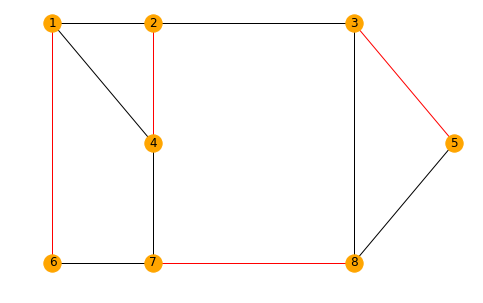

In [14]:
# plot solution graph
plt.figure(figsize=(8,5))
plt.axis('off')

pos = {1:(0,2),2:(1,2),3:(3,2),4:(1,1),5:(4,1),6:(0,0),7:(1,0),8:(3,0)}
node_labels = {i:i for i in G.nodes()}

edge_colors = ['red' if i.x == 1 else 'black' for i in edge_cover.getVars()]

nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_color='orange')
nx.draw_networkx_edges(G,pos,edgelist=G.edges(),edge_color=edge_colors)
nx.draw_networkx_labels(G,pos,labels=node_labels)

print("sol G:")